# Tugas Praktikum
- Load dataset MNIST dari Keras.
- Bangun model dengan 2 hidden layer.
- Latih model dan evaluasi akurasi.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 1. Load dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisasi data (0-255 → 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. Bangun model JST
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Ubah gambar 28x28 menjadi vektor
    Dense(128, activation='relu'),  # Hidden layer 1: 128 neuron
    Dense(64, activation='relu'),   # Hidden layer 2: 64 neuron
    Dense(10, activation='softmax') # Output layer (10 kelas)
])

# 3. Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Latih model
print("Training baseline model (128, 64 neurons, ReLU)...")
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1, verbose=0)

# 5. Evaluasi model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi pada data uji: {acc:.4f}")
print(f"Loss: {loss:.4f}")

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training baseline model (128, 64 neurons, ReLU)...
Akurasi pada data uji: 0.9769
Loss: 0.0789
Akurasi pada data uji: 0.9769
Loss: 0.0789


## Coba dengan beberapa parameter lain:
- Ubah jumlah neuron di hidden layer (misal: 256 dan 128).
- Tambahkan satu hidden layer lagi.
- Bandingkan akurasi dan waktu pelatihan.
- Eksperimen dengan fungsi aktivasi Sigmoid vs ReLU.


Training: 2-layer (128,64) ReLU


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  Accuracy: 0.9774 | Loss: 0.0854 | Time: 23.38s

Training: 2-layer (256,128) ReLU
  Accuracy: 0.9805 | Loss: 0.0783 | Time: 27.30s

Training: 3-layer (256,128,64) ReLU
  Accuracy: 0.9805 | Loss: 0.0783 | Time: 27.30s

Training: 3-layer (256,128,64) ReLU
  Accuracy: 0.9747 | Loss: 0.1044 | Time: 27.87s

Training: 2-layer (256,128) Sigmoid
  Accuracy: 0.9747 | Loss: 0.1044 | Time: 27.87s

Training: 2-layer (256,128) Sigmoid
  Accuracy: 0.9756 | Loss: 0.0799 | Time: 28.53s
HASIL PERBANDINGAN
  Accuracy: 0.9756 | Loss: 0.0799 | Time: 28.53s
HASIL PERBANDINGAN


,accuracy,loss,train_time
"2-layer (128,64) ReLU",0.9774,0.0854,23.38
"2-layer (256,128) ReLU",0.9805,0.0783,27.30
"3-layer (256,128,64) ReLU",0.9747,0.1044,27.87
"2-layer (256,128) Sigmoid",0.9756,0.0799,28.53


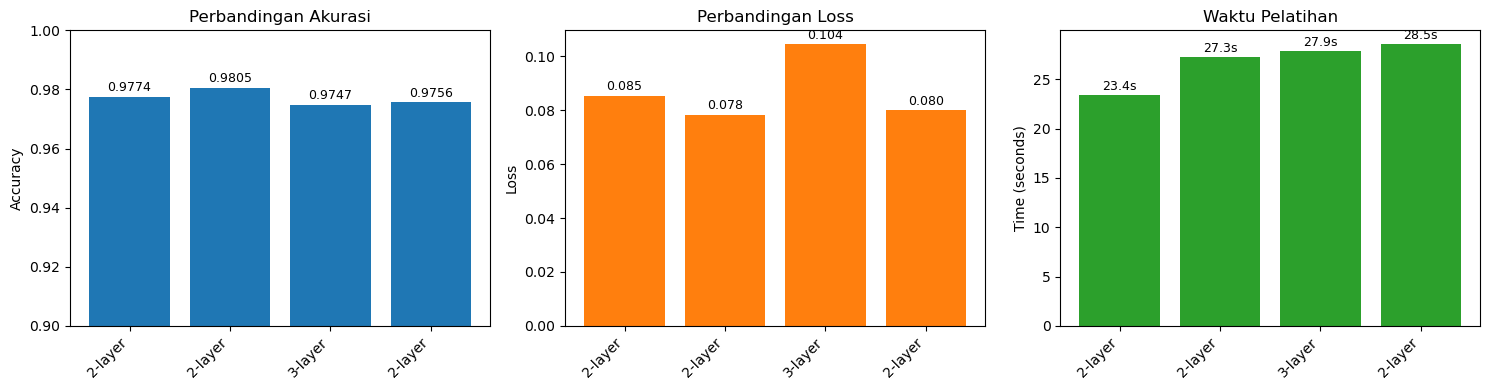


✓ Konfigurasi terbaik (berdasarkan akurasi): 2-layer (256,128) ReLU
  Akurasi: 0.9805
  Waktu: 27.30s


In [3]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define configurations to test
config_list = {
    '2-layer (128,64) ReLU': {
        'layers': [128, 64],
        'activation': 'relu'
    },
    '2-layer (256,128) ReLU': {
        'layers': [256, 128],
        'activation': 'relu'
    },
    '3-layer (256,128,64) ReLU': {
        'layers': [256, 128, 64],
        'activation': 'relu'
    },
    '2-layer (256,128) Sigmoid': {
        'layers': [256, 128],
        'activation': 'sigmoid'
    },
}

results_dict = {}

for config_name, config_params in config_list.items():
    print(f"\nTraining: {config_name}")
    tf.keras.backend.clear_session()
    
    # Build model
    model = Sequential([Flatten(input_shape=(28, 28))])
    for units in config_params['layers']:
        model.add(Dense(units, activation=config_params['activation']))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train & measure time
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1, verbose=0)
    train_time = time.time() - start_time
    
    # Evaluate
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    results_dict[config_name] = {
        'accuracy': accuracy,
        'loss': loss,
        'train_time': train_time
    }
    print(f"  Accuracy: {accuracy:.4f} | Loss: {loss:.4f} | Time: {train_time:.2f}s")

# results
results_df = pd.DataFrame(results_dict).T
print("HASIL PERBANDINGAN")
display(results_df.style.format({'accuracy': '{:.4f}', 'loss': '{:.4f}', 'train_time': '{:.2f}'}))

# Plot comparisons
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Accuracy
axes[0].bar(range(len(results_df)), results_df['accuracy'], color='tab:blue')
axes[0].set_xticks(range(len(results_df)))
axes[0].set_xticklabels([name.split('(')[0].strip() for name in results_df.index], rotation=45, ha='right')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Perbandingan Akurasi')
axes[0].set_ylim([0.9, 1.0])
for i, value in enumerate(results_df['accuracy']):
    axes[0].text(i, value + 0.002, f"{value:.4f}", ha='center', fontsize=9)

# Loss
axes[1].bar(range(len(results_df)), results_df['loss'], color='tab:orange')
axes[1].set_xticks(range(len(results_df)))
axes[1].set_xticklabels([name.split('(')[0].strip() for name in results_df.index], rotation=45, ha='right')
axes[1].set_ylabel('Loss')
axes[1].set_title('Perbandingan Loss')
for i, value in enumerate(results_df['loss']):
    axes[1].text(i, value + 0.002, f"{value:.3f}", ha='center', fontsize=9)

# Training Time
axes[2].bar(range(len(results_df)), results_df['train_time'], color='tab:green')
axes[2].set_xticks(range(len(results_df)))
axes[2].set_xticklabels([name.split('(')[0].strip() for name in results_df.index], rotation=45, ha='right')
axes[2].set_ylabel('Time (seconds)')
axes[2].set_title('Waktu Pelatihan')
for i, value in enumerate(results_df['train_time']):
    axes[2].text(i, value + 0.5, f"{value:.1f}s", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Conclusion
best_config_idx = results_df['accuracy'].idxmax()
print(f"\n✓ Konfigurasi terbaik (berdasarkan akurasi): {best_config_idx}")
print(f"  Akurasi: {results_df.loc[best_config_idx, 'accuracy']:.4f}")
print(f"  Waktu: {results_df.loc[best_config_idx, 'train_time']:.2f}s")